In [59]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as pp
import warnings
from tkinter import *
from tkinter import simpledialog as sml

# Input Breast Cancer Data Set and we selected the last 10 parameters because they provided the highest accuracy

In [4]:
df=pd.read_csv('BreastCancer.csv',index_col=False)
data=df[["diagnosis","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
         "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]]
data.tail(10)

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,B,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,B,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,B,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,M,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,M,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,M,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,M,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,M,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,M,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,B,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


# We have to turn the diagnosis column into string values for operations so we changed Malignant(M) to 1 and Beingn(B) to 0

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
#cleaning the data Malegnin Cancer is 1 and Benign is 0
    data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')


# plotting the diagnosis with radius

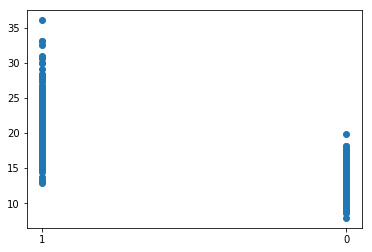

In [6]:
a=data['diagnosis']
b=data['radius_worst']
plt.scatter(a,b)
plt.show()

# input diagnosis  into a variable 

In [7]:
y=data['diagnosis'].values

# plotting radius against  other features to depict data

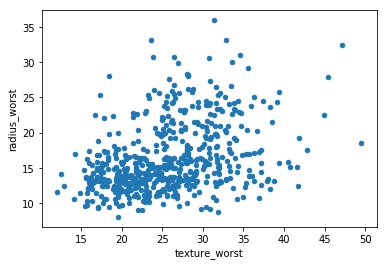

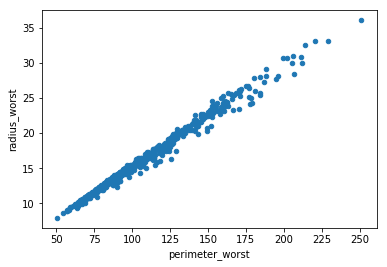

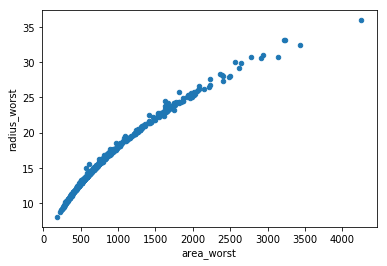

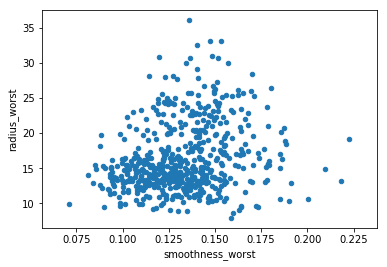

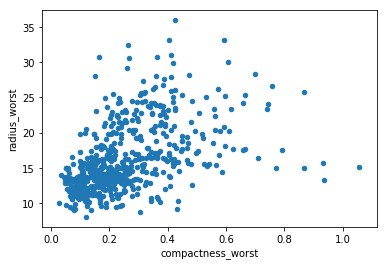

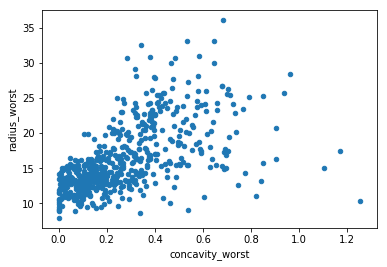

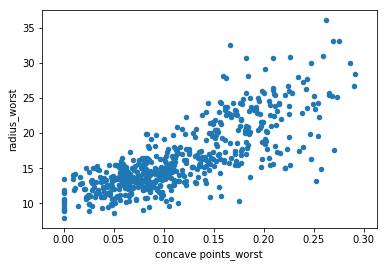

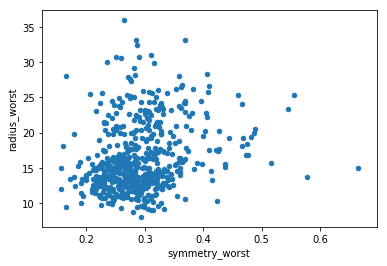

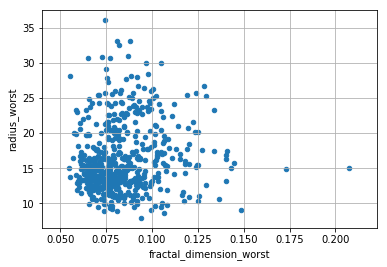

In [8]:

data.plot(kind = 'scatter' , x = 'texture_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'perimeter_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'area_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'smoothness_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'compactness_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'concavity_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'concave points_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'symmetry_worst' , y = 'radius_worst')
data.plot(kind = 'scatter' , x = 'fractal_dimension_worst' , y = 'radius_worst')
plt.grid()
plt.show()


In [9]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [10]:
print(data.shape)

(569, 11)


In [11]:
data.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Fitting Data into training and testing

In [12]:
y=data['diagnosis'].values
x=data.drop('diagnosis',axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

# Checking Efficiency of different models

In [13]:
mlist=[]
mlist.append(('Logistic Regression',LogisticRegression()))
mlist.append(('SVM',SVC()))
mlist.append(('KNN',KNeighborsClassifier()))

In [14]:
k=10
results=[]
names=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name,model in mlist:
        kfold=KFold(n_splits=k,random_state=112)
        start=time.time()
        cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
        end=time.time()
        results.append(cv_results)
        names.append(name)
        print('%s:%f(%f)(run time:%f)'%(name,cv_results.mean(),cv_results.std(),end-start))

Logistic Regression:0.947101(0.031698)(run time:0.066528)
SVM:0.654589(0.070438)(run time:0.314708)
KNN:0.914541(0.047119)(run time:0.048533)


# The data which has the maximum efficiency in the code is used as the model

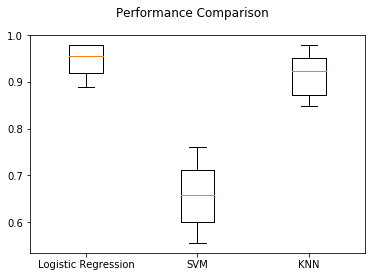

In [15]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:

M=LogisticRegression()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    M.fit(x_train,y_train)
    prediction=M.predict(x_test)
    print(prediction)


['0' '1' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1'
 '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '1'
 '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1'
 '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '1'
 '0' '1' '0' '0' '1' '0']


In [17]:
print(accuracy_score(y_test,prediction))

0.956140350877193


[[65  1]
 [ 4 44]]


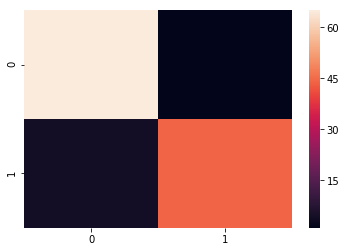

In [18]:
cf=confusion_matrix(y_test,prediction)
print(cf)
sns.heatmap(cf)

In [19]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.92      0.95        48

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Entering survival data in which the person will survive if survival_status is 1 otherwise not

In [20]:
hbr=pd.read_csv("haberman.csv",delimiter=",")
print(hbr.shape)
hbr["Survival_Status"].value_counts()

(306, 4)


1    225
2     81
Name: Survival_Status, dtype: int64

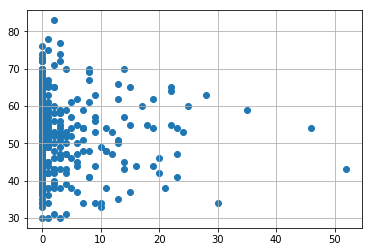

In [21]:
plt.scatter(hbr.Axillary_nodes,hbr.Age) 
plt.grid()
plt.show()

C:\Users\Kingbash\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


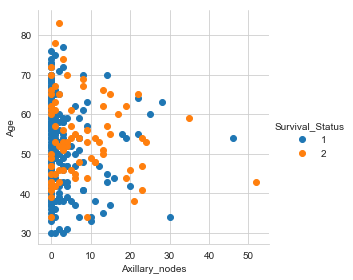

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(hbr, hue="Survival_Status", size=4) \
 .map(plt.scatter, "Axillary_nodes", "Age") \
 .add_legend();
plt.show();

C:\Users\Kingbash\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


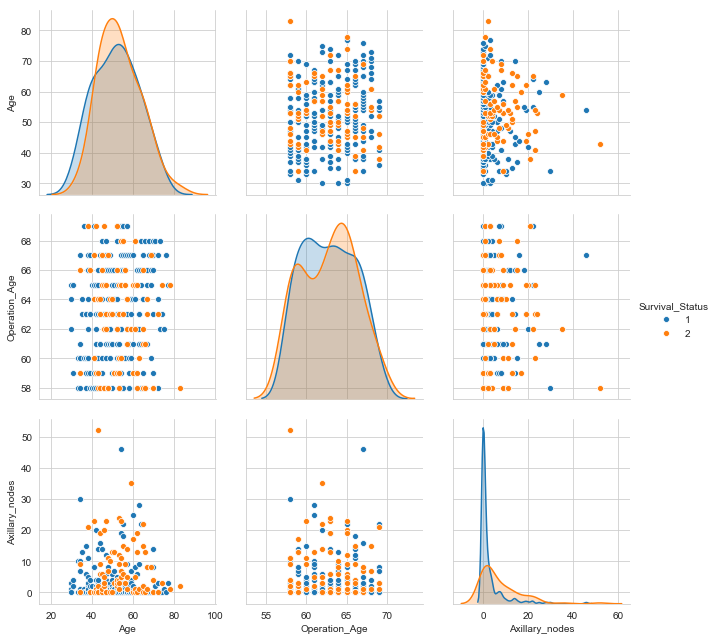

In [23]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbr, hue="Survival_Status", size=3, vars=['Age','Operation_Age', 'Axillary_nodes'])
plt.show()

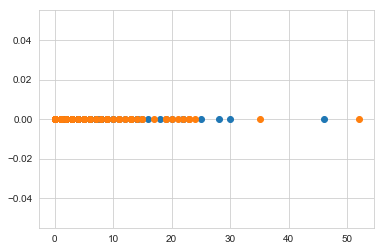

In [24]:
import numpy as np
haberman_Long_Survive = hbr.loc[hbr["Survival_Status"] == 1];
haberman_Short_Survive = hbr.loc[hbr["Survival_Status"] == 2];
plt.plot(haberman_Long_Survive["Axillary_nodes"], np.zeros_like(haberman_Long_Survive["Axillary_nodes"]), 'o')
plt.plot(haberman_Short_Survive["Axillary_nodes"], np.zeros_like(haberman_Short_Survive['Axillary_nodes']), 'o')
plt.show()

C:\Users\Kingbash\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


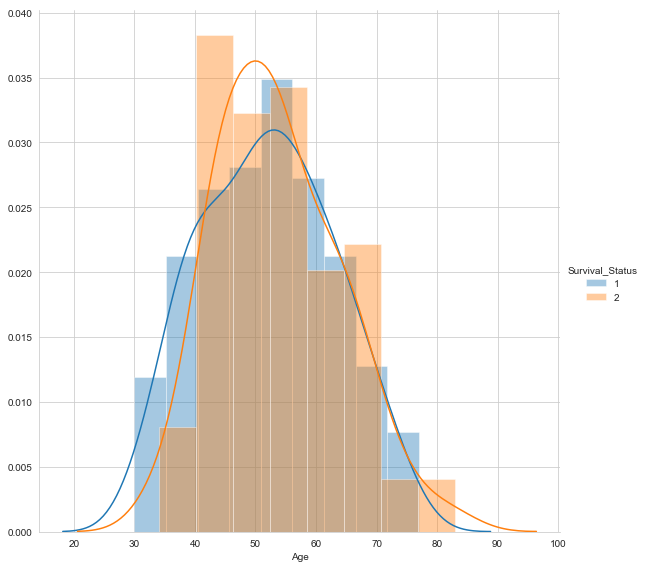

In [25]:
sns.FacetGrid(hbr,hue="Survival_Status", size=8)\
.map(sns.distplot,"Age")\
.add_legend()

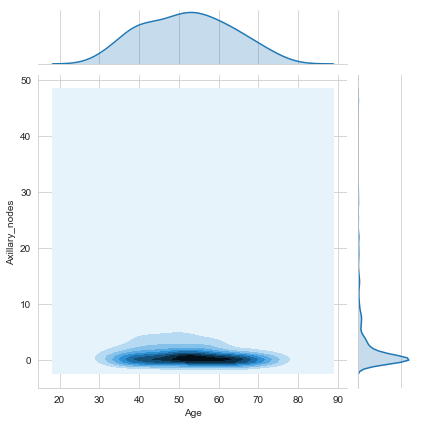

In [26]:
sns.jointplot(x="Age",y="Axillary_nodes",data=haberman_Long_Survive,kind="kde")
plt.grid()
plt.show()


In [71]:
y1=(hbr['Survival_Status'])
x1=(hbr.drop('Survival_Status',axis=1))
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=20)

In [72]:
SVM=SVC()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    SVM.fit(x1,y1)
    pred=SVM.predict(x1_test)
    print(pred)

[1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


In [63]:
print(confusion_matrix(y1_test,pred))

[[44  0]
 [ 6 12]]


In [64]:
print(accuracy_score(y1_test,pred))

0.9032258064516129


In [65]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        44
           2       1.00      0.67      0.80        18

   micro avg       0.90      0.90      0.90        62
   macro avg       0.94      0.83      0.87        62
weighted avg       0.91      0.90      0.90        62



# Making input windows using tkinter library and entering the attributes asked in the dialog box to get the output for malignant or beingn cancer of if the patient will survive or not


In [76]:

input=[]
ab=[]
def quit1():
    global root1
#     global root2
    root1.destroy()
#     root2.destroy()
def get():
    a=sml.askfloat("Input","Enter Age")
    ab.append(a)
    b=sml.askfloat("Input","Enter Operation year")
    ab.append(b)
    c=sml.askfloat("Input","Enter Axillary nodes:")
    ab.append(c)
    w=SVM.predict([ab])
    if w==[1]:
        print("Patient may survive for 5 year or more")
        quit1()
        root2=Tk()
        f=Label(root2,text="Patient may survive for 5 year or more")
        f.pack()
#         root4.geometry("50x50")
        root2.mainloop()
    
    
    else:
        print("Patient may survive less than 5 years")
        quit1()
        root2=Tk()
        f=Label(root2,text="Patient may survive less than 5 years")
        f.pack()
#         root4.geometry("50x50")
        root2.mainloop()

    

        
def getx():
    a=sml.askfloat("Input","Radius(7,36)")
    input.append(a)
    b=sml.askfloat("Input","Texture(12,50)")
    input.append(b)
    c=sml.askfloat("Input","Perimeter(50,250)")
    input.append(c)
    d=sml.askfloat("Input","Area(150,4500)")
    input.append(d)
    e=sml.askfloat("Input","Smoothness(0.05,0.25)")
    input.append(e)
    f=sml.askfloat("Input","Compactness(0.025,1.1)")
    input.append(f)
    g=sml.askfloat("Input","Concavity(0,1.5)")
    input.append(g)
    h=sml.askfloat("Input","Concave points(0,0.3)")
    input.append(h)
    i=sml.askfloat("Input","Symmetry(0.15,0.7)")
    input.append(i)
    j=sml.askfloat("Input","Fractal_dimension(0.05,0.2)")
    input.append(j)

    p=M.predict([input])
    
    if p==['0']:
        print("Cancer is Benign")
        quit1()
        root2=Tk()
        f=Label(root2,text="Cancer is Benign")
        f.pack()
        root2.geometry("50x50")
        root2.mainloop()
        
    else:
        print("Cancer is Malignant")
        quit1()
        root2=Tk()
        f=Label(root2,text="Cancer is Malignant")
        f.pack()
        root2.geometry("50x50")
        root2.mainloop()
        
    
root1=Tk()

a=Label(root1,text="Breast Cancer prediction",bg="SkyBlue4",fg="lavender",font=10,width=100)
a.pack()
b=Label(root1,text="To predict Malignant or Benign Cancer on the Basis of the following features:\n\n Radius\nTexture\nPerimeter\nArea\nSmoothness\nCompactness\nConcavity\nConcave points\nSymmetry\nFractal dimension",height=12,bg="lavender")
b.pack()
button1=Button(root1,text="Enter attributes ",bg="cyan4",fg="white",command=getx,font=3,width=20)
button1.pack()



zz=Label(root1,height=1)
zz.pack()
c=Label(root1,text="Survival prediction",bg="SkyBlue4",fg="lavender",font=10,width=100)
c.pack()
d=Label(root1,bg="lavender",text="To predict the survival of patient on the Basis of the following features:\n\n Age\nOperation Age\nAxillary nodes",height=6)
d.pack()
button2=Button(root1,text="Enter Atrributes ",bg="cyan4",fg="white",command=get,font=3,width=20)
button2.pack()

root1.geometry("500x500")

root1.mainloop()



Patient may survive less than 5 years


In [80]:
#Input values to get required output

a1=[25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]
a2=[15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259]
print(M.predict([a1]))
print(M.predict([a2]))
b1=[30,64,1]
b2=[34,66,9]
print(SVM.predict([b1]))
print(SVM.predict([b2]))

['1']
['0']
[1]
[2]
